# Visualization using Seaborn


## Introduction

#### What is Seaborn?
* Based on matplotlib
* Focus on statistical visualization
* Offer fast and convenient data exploration

#### Common Type of Plots
* Relational plots
* Categorical plots

https://seaborn.pydata.org/api.html

In [45]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set some configurations, including matplotlib plotting style.

In [3]:
sns.set()

#### Toy Datasets

Seanborn provides some toy datasets. The data is hosted in Github. https://github.com/mwaskom/seaborn-data


In [8]:
sns.load_dataset?

## Iris Dataset

Iris dataset is one of the most frequently used datasets in learning materials for machine learning. 
* It contains 3 classes of 50 instance each, where each class refers to a type of iris plant. 
* One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

**Petal vs Sepal**

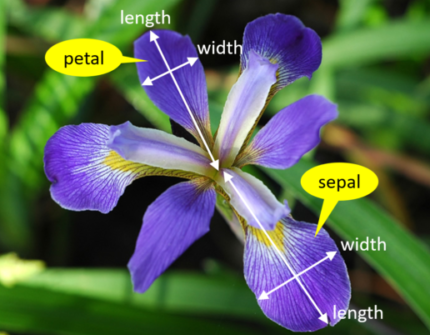

In [16]:
iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [17]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

### Relational Plots

Relational Plots support exploration of relationships between attributes through Scatter Plot and and Line Plots.
* Its `relplot()` function is a figure-level interface for `scatterplot` and `lineplot`, which are axes-level plots.

In [25]:
sns.relplot?

Let's examine the relationship between `sepal_width` and `sepal_length`.

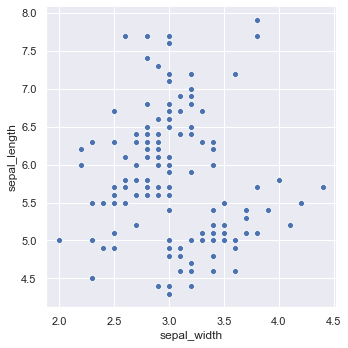

In [22]:
sns.relplot(data=iris, x='sepal_width', y='sepal_length')

We can use color to represent different subsets of data. For example, use color to represent different `species`.

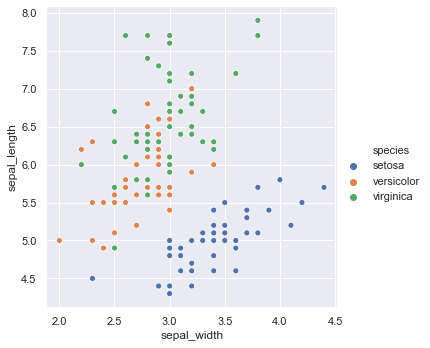

In [29]:
sns.relplot(data=iris, x='sepal_width', y='sepal_length', hue='species')

With Seaborn, you can easily add subplots for subsets of data.
* Subplots can be added in `col` or `row`.

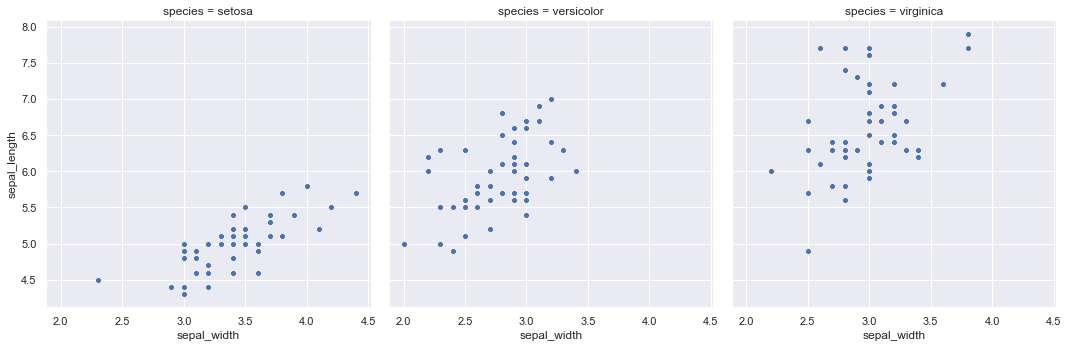

In [27]:
sns.relplot(data=iris, x='sepal_width', y='sepal_length', col='species')

### Pairplots

A pairplot plots a pairwise relationships on all numeric columns in a dataset.

In [131]:
sns.pairplot?

Create a pairplot using `iris` dataset.
* Our dataset has 4 numeric columns. Thus it creates 4 x 4 subplots.
* You can specify fewer columns using `vars` parameter.

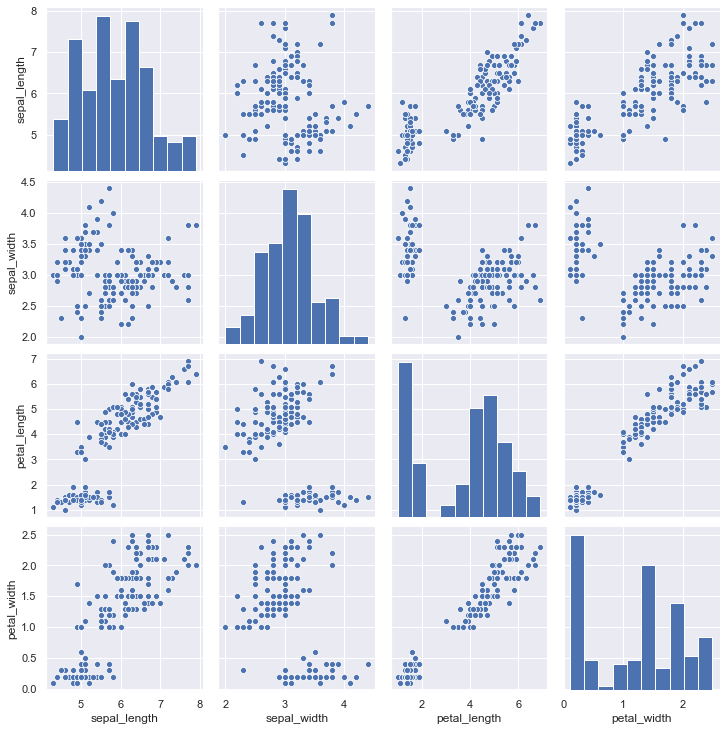

In [134]:
sns.pairplot(iris)

Similarly, `hue` and `style` parameters can be used to add dimension to the plot. 

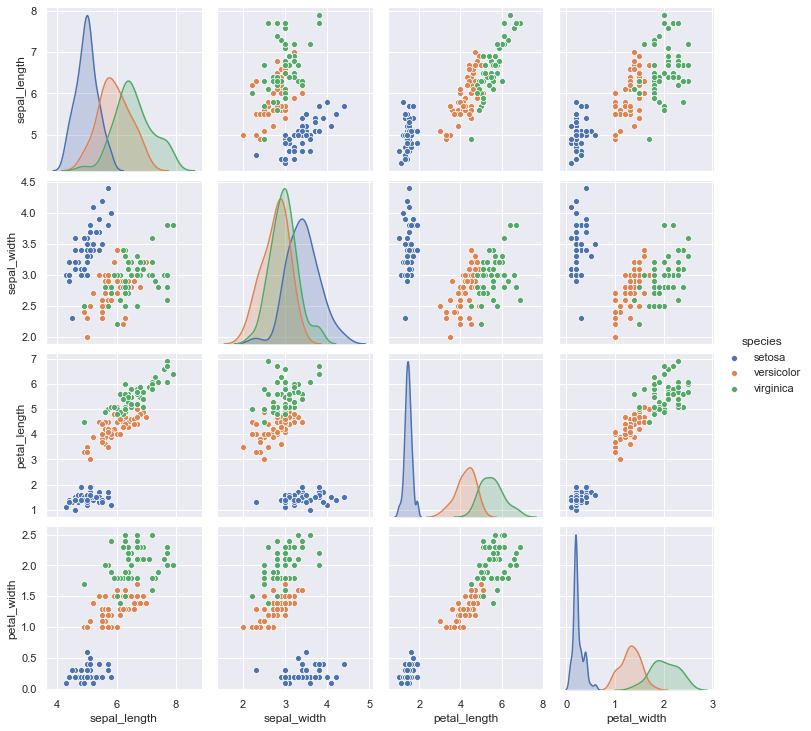

In [135]:
sns.pairplot(data=iris, hue='species')

### Categorical Plots

To find out the distribution of `sepal_width` values for each specie, we can use categorical plot `catplot()`.   

In [122]:
sns.catplot?

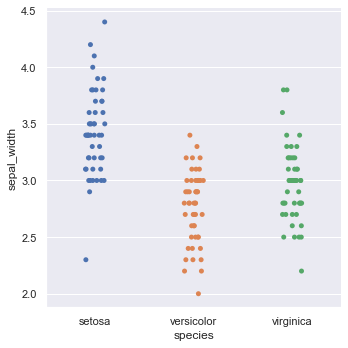

In [121]:
sns.catplot(data=iris, x='species', y='sepal_width')

In [123]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Pandas dataframe supports **melting** of multiple columns into a single column.
* We can combine all measurement columns into a single column `attr`.

In [127]:
iris_melt = pd.melt(iris, id_vars=['species'], var_name='attr')
iris_melt.head()

,species,attr,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


With melt dataset, we can plot add `attr` to the category plot.

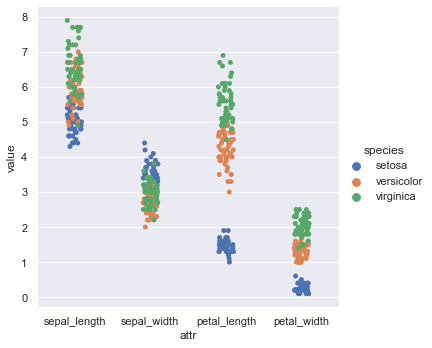

In [242]:
sns.catplot(data=iris_melt, x='attr', y='value', hue='species')

We can change the plot to boxplots.

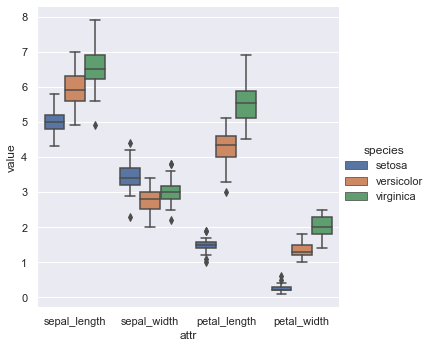

In [241]:
sns.catplot(data=iris_melt, x='attr', y='value', hue='species', kind='box')

## Flights Dataset

### Relational Plots - Line Plot 

In [31]:
flights = sns.load_dataset('flights')

In [33]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [32]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Make sure every year has data for all its 12 months.

In [244]:
flights['year'].value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

Plot the line graph. 

<class 'seaborn.axisgrid.FacetGrid'>


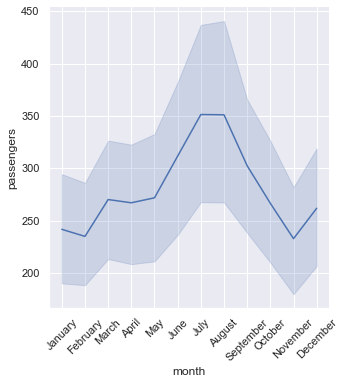

In [245]:
ax = sns.relplot(data=flights, x='month', y='passengers', kind='line')
print(type(ax))
ax.set_xticklabels(rotation=45)

We can save the image.

In [247]:
ax.savefig('flights.png')

To have different lines for different years, we can set `hue` parameter to `year`. 

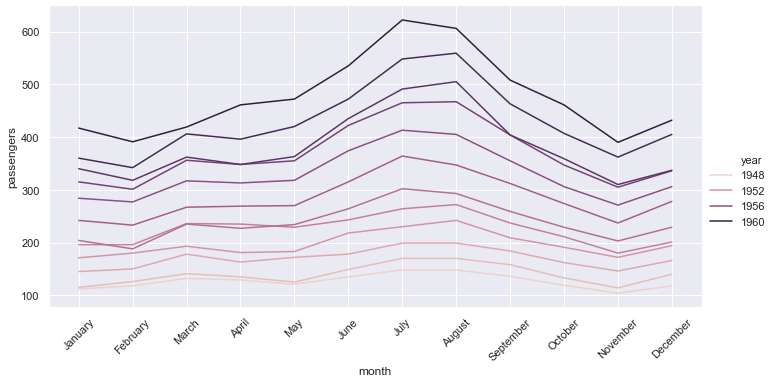

In [201]:
ax = sns.relplot(data=flights, x='month', y='passengers', hue='year', kind='line', aspect=2)
ax.set_xticklabels(rotation=45)

### Regression Plots

How does the number of passengers changes over the years? 

In [192]:
flights.groupby?

We need to find total passengers for each year.

In [191]:
flights_m = flights.groupby(by='year', as_index=False).sum()
flights_m

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


Use regression plot `lmplot` to plot the graph.

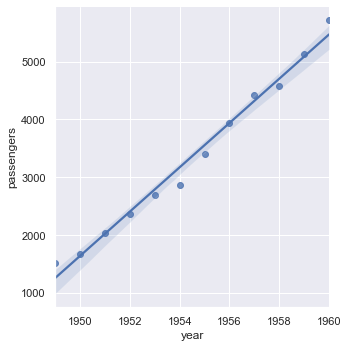

In [190]:
sns.lmplot(data=flights_m, x='year', y='passengers')